In [31]:
import os
import numpy as np
import geopandas as gpd
import xarray as xr
from shapely.geometry import box, Point, Polygon, MultiPolygon

wd = "/Users/alison/Documents/SWAN/demos/stvincent"

/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_96821/4122628703.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopanda

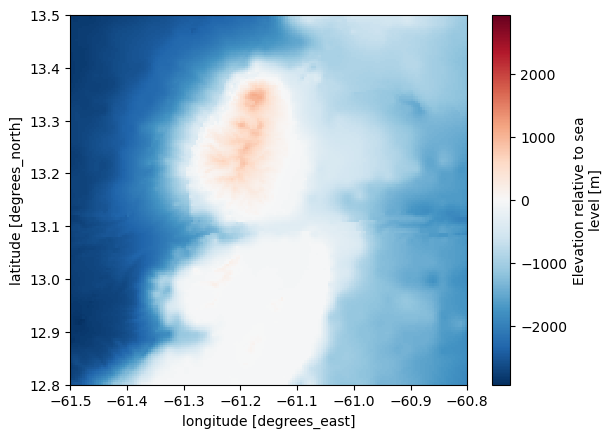

In [32]:
gebco = xr.open_dataset(os.path.join(wd, 'gebco_data', 'gebco_2023_n13.5_s12.8_w-61.5_e-60.8.nc'))
gebco.elevation.plot()

<Axes: >

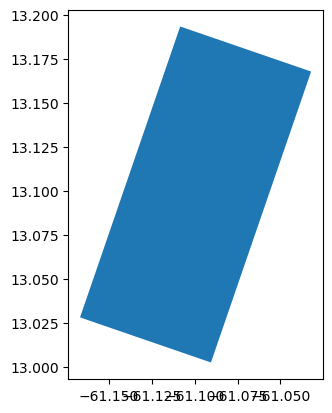

In [195]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
centre = np.array([13.0979, -61.0995])
centre = transformer.transform(*centre)
l, w, rotation = 10_000, 4_500, 71
rotation *= (np.pi / 180)

L = np.sqrt(l**2 + w**2)
angle = np.arctan(w / l)

def rotation_mat(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

rm = rotation_mat(rotation)
corners = [(l, w), (-l, w), (-l, -w), (l, -w)]

corners_rotation = [rm @ corner for corner in corners]
corners_rotation =[corner + centre for corner in corners_rotation]

aoi = Polygon(corners_rotation)
aoi = gpd.GeoDataFrame(geometry=[aoi], crs=3857)
aoi.to_crs(4326).plot()

<Axes: xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

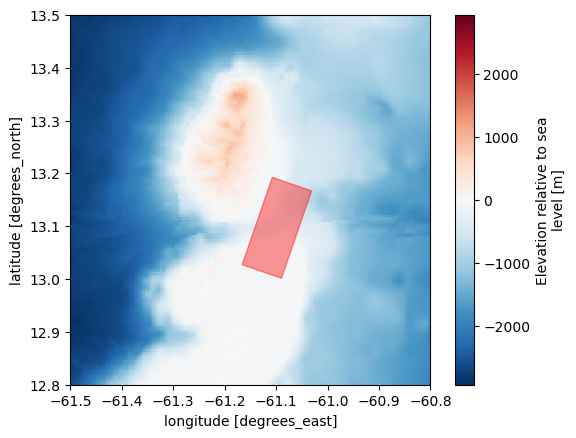

In [196]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gebco.elevation.plot(ax=ax)
aoi.to_crs(4326).plot(ax=ax, alpha=.4, edgecolor='red', color='red')

In [218]:
grid_stats = gpd.read_file(os.path.join(wd, 'gebco_data', 'grid_stats.gpkg'), crs=4326)

In [216]:
grid_stats = grid_stats.to_crs(4326)

,_mean,geometry
0,-889.480364,"POLYGON ((-61.20239 13.08707, -61.20212 13.087..."
1,-897.525552,"POLYGON ((-61.20161 13.08680, -61.20134 13.087..."
2,-892.951324,"POLYGON ((-61.20082 13.08653, -61.20055 13.087..."
3,-858.142354,"POLYGON ((-61.20004 13.08626, -61.19977 13.087..."
4,-858.000000,"POLYGON ((-61.19925 13.08599, -61.19898 13.086..."
...,...,...
27450,-612.000000,"POLYGON ((-61.05394 13.28876, -61.05367 13.289..."
27451,-612.000000,"POLYGON ((-61.05315 13.28849, -61.05288 13.289..."
27452,-612.000000,"POLYGON ((-61.05237 13.28822, -61.05210 13.289..."
27453,-612.000000,"POLYGON ((-61.05158 13.28795, -61.05131 13.288..."


<Axes: xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

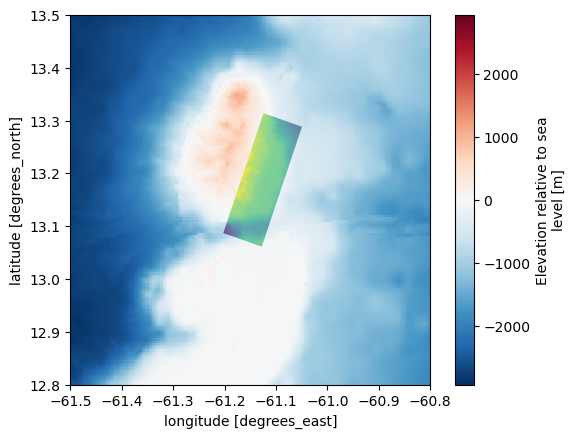

In [219]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gebco.elevation.plot(ax=ax)
grid_stats.plot('_mean', ax=ax)

In [211]:
aoi_ds.geometry

0    POLYGON ((-61.10848 13.19343, -61.16697 13.027...
Name: geometry, dtype: geometry

In [198]:
aoi_ds = aoi.to_crs(4326)
aoi_ds['lat'] = 


aoi_ds = xr.Dataset.from_dataframe(aoi.to_crs(4326))

In [199]:
aoi_ds

<xarray.Dataset>
Dimensions:   (index: 1)
Coordinates:
  * index     (index) int64 0
Data variables:
    geometry  (index) object POLYGON ((-61.10847553553744 13.193427533246986,...

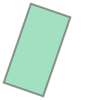

0.46364760900080615

In [103]:
corners = [rotate(L, angle) for angle in angles]
corners = [centre + corner for corner in corners]

In [104]:
corners

[array([-61.0995    ,  24.27823989]),
 array([-61.0995    ,   1.91756011]),
 array([-61.0995    ,  24.27823989]),
 array([-61.0995    ,   1.91756011])]

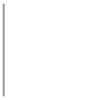

In [105]:
Polygon(corners)

In [51]:
x1, y1 = (length * np.cos(rotation), length * np.sin(rotation))
x2, y2 = (np.cos(θ + rotation), np.sin(θ + rotation))

In [52]:

LineSting


NameError: name 'LineSting' is not defined

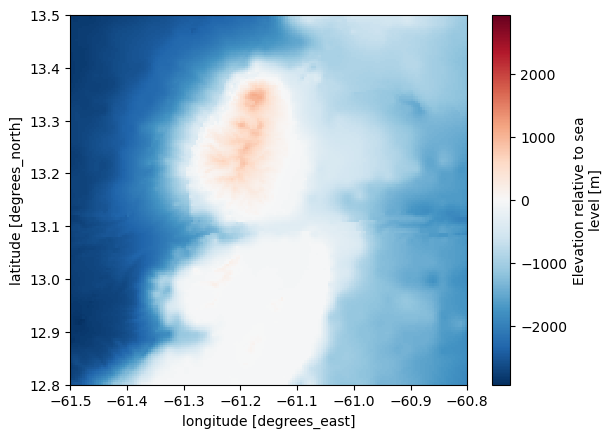

In [25]:
# Select the subset of data based on specific criteria
subset = gebco.sel(lon=slice(-61-4.5, -61+4.5), lat=slice(13-10, 13+10))

# # Rotate the grid by 71 degrees from north
# rotated = subset.rotate(angle=71, axes=('lon', 'lat'), origin=(-61, 13), reshape=False)

# # Extract the grid of size 20 x 9
# grid = rotated.sel(lon=slice(-2.25, 2.25), lat=slice(-4.5, 4.5))

# Plot the grid
subset.elevation.plot()

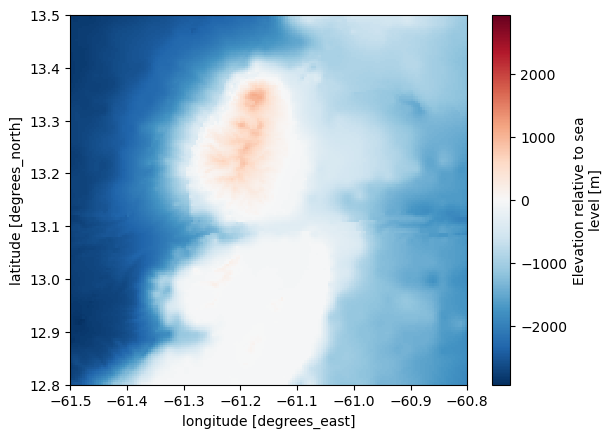

In [19]:
subset.elevation.plot()